In [1]:
#load library
import pandas as pd
import numpy as np
import csv
from nltk.corpus import stopwords
import nltk as nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob

In [2]:
#membaca file csv
# train Data
trainData = pd.read_csv(open('DATA TES/DATA_TES2.csv', newline='', encoding='utf-8'), delimiter=';')
# test Data
# testData = pd.read_csv(open('DATA TEST/DATAUJI10001.csv', newline='', encoding='utf-8'), delimiter=';')

In [3]:
#menampilkan dari fle csv
print (trainData.shape)
trainData.head(10)

(15, 6)


,no,username,name,tweet,language,Label
0,1,kojekrapbetawi,Muhammad Amrullah,Selamat pagi Indonesia #pilkadacovid https://...,in,POS
1,2,benar_berita,BenarNews Indonesia,Hasil Hitung Cepat: Anak dan Menantu Jokowi Me...,in,NEG
2,3,suprabacot,scutellaria,permisi... nitip dong ???? #fyp #pilkadaserent...,in,POS
3,4,lestarisarmi,Sarmi Lestari,pilkada2020 #pilkadacovid #pilkadamaut Data p...,in,NEG
4,5,bawaslujatim,Bawaslu Jatim,"Evaluasi Media Sosial Bawaslu Jatim, Youtube P...",in,POS
5,6,masjidrayakbm,MASJID RAYA,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,NEG
6,7,balanekangjuki,WongKebumenBisaNgapaBaen,#masukpakeko Gus Yazid Ajak Masyarakat Dukung...,in,POS
7,8,penyebarkabar,Korban PHP,#Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati...,in,NEG
8,9,ini_net,ini.kebumen.net,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,POS
9,10,nasdem,Partai NasDem,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,in,NEG


PROSES PREPRCESSING

In [4]:
#update data stopwords
stopset = set(stopwords.words('indonesian'))
stopset.update(['kirim','kabar','lindung','pilkadacovid','bawaslukotadepokkawalpilkada'])

In [5]:
import re
def clean_tweets(row):
    review = row['tweet']
    drop = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", review).split())
    return drop
trainData['clean_tweets'] = trainData.apply(clean_tweets, axis=1)

In [6]:
trainData

,no,username,name,tweet,language,Label,clean_tweets
0,1,kojekrapbetawi,Muhammad Amrullah,Selamat pagi Indonesia #pilkadacovid https://...,in,POS,Selamat pagi Indonesia pilkadacovid
1,2,benar_berita,BenarNews Indonesia,Hasil Hitung Cepat: Anak dan Menantu Jokowi Me...,in,NEG,Hasil Hitung Cepat Anak dan Menantu Jokowi Men...
2,3,suprabacot,scutellaria,permisi... nitip dong ???? #fyp #pilkadaserent...,in,POS,permisi nitip dong fyp pilkadaserentak2020 PIL...
3,4,lestarisarmi,Sarmi Lestari,pilkada2020 #pilkadacovid #pilkadamaut Data p...,in,NEG,pilkada2020 pilkadacovid pilkadamaut Data per ...
4,5,bawaslujatim,Bawaslu Jatim,"Evaluasi Media Sosial Bawaslu Jatim, Youtube P...",in,POS,Evaluasi Media Sosial Bawaslu Jatim Youtube Pa...
5,6,masjidrayakbm,MASJID RAYA,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,NEG,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...
6,7,balanekangjuki,WongKebumenBisaNgapaBaen,#masukpakeko Gus Yazid Ajak Masyarakat Dukung...,in,POS,masukpakeko Gus Yazid Ajak Masyarakat Dukung B...
7,8,penyebarkabar,Korban PHP,#Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati...,in,NEG,Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati d...
8,9,ini_net,ini.kebumen.net,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,POS,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...
9,10,nasdem,Partai NasDem,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,in,NEG,DPP Partai NasDem juga menunjuk Kakak Hermawi ...


In [7]:
#proses tokenizng
def identify_tokens(row):
    review = row['clean_tweets']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens]
    return token_words

trainData['tokenizing_word'] = trainData.apply(identify_tokens, axis=1)

In [8]:
trainData

,no,username,name,tweet,language,Label,clean_tweets,tokenizing_word
0,1,kojekrapbetawi,Muhammad Amrullah,Selamat pagi Indonesia #pilkadacovid https://...,in,POS,Selamat pagi Indonesia pilkadacovid,"[Selamat, pagi, Indonesia, pilkadacovid]"
1,2,benar_berita,BenarNews Indonesia,Hasil Hitung Cepat: Anak dan Menantu Jokowi Me...,in,NEG,Hasil Hitung Cepat Anak dan Menantu Jokowi Men...,"[Hasil, Hitung, Cepat, Anak, dan, Menantu, Jok..."
2,3,suprabacot,scutellaria,permisi... nitip dong ???? #fyp #pilkadaserent...,in,POS,permisi nitip dong fyp pilkadaserentak2020 PIL...,"[permisi, nitip, dong, fyp, pilkadaserentak202..."
3,4,lestarisarmi,Sarmi Lestari,pilkada2020 #pilkadacovid #pilkadamaut Data p...,in,NEG,pilkada2020 pilkadacovid pilkadamaut Data per ...,"[pilkada2020, pilkadacovid, pilkadamaut, Data,..."
4,5,bawaslujatim,Bawaslu Jatim,"Evaluasi Media Sosial Bawaslu Jatim, Youtube P...",in,POS,Evaluasi Media Sosial Bawaslu Jatim Youtube Pa...,"[Evaluasi, Media, Sosial, Bawaslu, Jatim, Yout..."
5,6,masjidrayakbm,MASJID RAYA,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,NEG,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,..."
6,7,balanekangjuki,WongKebumenBisaNgapaBaen,#masukpakeko Gus Yazid Ajak Masyarakat Dukung...,in,POS,masukpakeko Gus Yazid Ajak Masyarakat Dukung B...,"[masukpakeko, Gus, Yazid, Ajak, Masyarakat, Du..."
7,8,penyebarkabar,Korban PHP,#Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati...,in,NEG,Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati d...,"[Mmmh, Gus, Yazid, Ajak, Masyarakat, Dukung, B..."
8,9,ini_net,ini.kebumen.net,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,POS,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,..."
9,10,nasdem,Partai NasDem,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,in,NEG,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,"[DPP, Partai, NasDem, juga, menunjuk, Kakak, H..."


In [9]:
#proses stemming
def stem_list(row):
    my_list = row['tokenizing_word']
    stemmed_list = [stemmer.stem(word) for word in my_list]
    return (stemmed_list)

trainData['stemming_word'] = trainData.apply(stem_list, axis=1)

In [10]:
trainData

,no,username,name,tweet,language,Label,clean_tweets,tokenizing_word,stemming_word
0,1,kojekrapbetawi,Muhammad Amrullah,Selamat pagi Indonesia #pilkadacovid https://...,in,POS,Selamat pagi Indonesia pilkadacovid,"[Selamat, pagi, Indonesia, pilkadacovid]","[selamat, pagi, indonesia, pilkadacovid]"
1,2,benar_berita,BenarNews Indonesia,Hasil Hitung Cepat: Anak dan Menantu Jokowi Me...,in,NEG,Hasil Hitung Cepat Anak dan Menantu Jokowi Men...,"[Hasil, Hitung, Cepat, Anak, dan, Menantu, Jok...","[hasil, hitung, cepat, anak, dan, menantu, jok..."
2,3,suprabacot,scutellaria,permisi... nitip dong ???? #fyp #pilkadaserent...,in,POS,permisi nitip dong fyp pilkadaserentak2020 PIL...,"[permisi, nitip, dong, fyp, pilkadaserentak202...","[permisi, nitip, dong, fyp, pilkadaserentak202..."
3,4,lestarisarmi,Sarmi Lestari,pilkada2020 #pilkadacovid #pilkadamaut Data p...,in,NEG,pilkada2020 pilkadacovid pilkadamaut Data per ...,"[pilkada2020, pilkadacovid, pilkadamaut, Data,...","[pilkada2020, pilkadacovid, pilkadamaut, data,..."
4,5,bawaslujatim,Bawaslu Jatim,"Evaluasi Media Sosial Bawaslu Jatim, Youtube P...",in,POS,Evaluasi Media Sosial Bawaslu Jatim Youtube Pa...,"[Evaluasi, Media, Sosial, Bawaslu, Jatim, Yout...","[evaluasi, media, sosial, bawaslu, jatim, yout..."
5,6,masjidrayakbm,MASJID RAYA,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,NEG,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,..."
6,7,balanekangjuki,WongKebumenBisaNgapaBaen,#masukpakeko Gus Yazid Ajak Masyarakat Dukung...,in,POS,masukpakeko Gus Yazid Ajak Masyarakat Dukung B...,"[masukpakeko, Gus, Yazid, Ajak, Masyarakat, Du...","[masukpakeko, gus, yazid, ajak, masyarakat, du..."
7,8,penyebarkabar,Korban PHP,#Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati...,in,NEG,Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati d...,"[Mmmh, Gus, Yazid, Ajak, Masyarakat, Dukung, B...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b..."
8,9,ini_net,ini.kebumen.net,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,POS,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,..."
9,10,nasdem,Partai NasDem,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,in,NEG,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,"[DPP, Partai, NasDem, juga, menunjuk, Kakak, H...","[dpp, partai, nasdem, juga, tunjuk, kakak, her..."


In [11]:
#proses Alpha
def is_alpha(row):
    my_alpha = row['stemming_word']
    is_alpha = [word for word in my_alpha if word.isalpha()]
    return (is_alpha)

trainData['panctuaton_word'] = trainData.apply(is_alpha, axis=1)

In [12]:
trainData

,no,username,name,tweet,language,Label,clean_tweets,tokenizing_word,stemming_word,panctuaton_word
0,1,kojekrapbetawi,Muhammad Amrullah,Selamat pagi Indonesia #pilkadacovid https://...,in,POS,Selamat pagi Indonesia pilkadacovid,"[Selamat, pagi, Indonesia, pilkadacovid]","[selamat, pagi, indonesia, pilkadacovid]","[selamat, pagi, indonesia, pilkadacovid]"
1,2,benar_berita,BenarNews Indonesia,Hasil Hitung Cepat: Anak dan Menantu Jokowi Me...,in,NEG,Hasil Hitung Cepat Anak dan Menantu Jokowi Men...,"[Hasil, Hitung, Cepat, Anak, dan, Menantu, Jok...","[hasil, hitung, cepat, anak, dan, menantu, jok...","[hasil, hitung, cepat, anak, dan, menantu, jok..."
2,3,suprabacot,scutellaria,permisi... nitip dong ???? #fyp #pilkadaserent...,in,POS,permisi nitip dong fyp pilkadaserentak2020 PIL...,"[permisi, nitip, dong, fyp, pilkadaserentak202...","[permisi, nitip, dong, fyp, pilkadaserentak202...","[permisi, nitip, dong, fyp, republiksulap, pil..."
3,4,lestarisarmi,Sarmi Lestari,pilkada2020 #pilkadacovid #pilkadamaut Data p...,in,NEG,pilkada2020 pilkadacovid pilkadamaut Data per ...,"[pilkada2020, pilkadacovid, pilkadamaut, Data,...","[pilkada2020, pilkadacovid, pilkadamaut, data,...","[pilkadacovid, pilkadamaut, data, per, dapat, ..."
4,5,bawaslujatim,Bawaslu Jatim,"Evaluasi Media Sosial Bawaslu Jatim, Youtube P...",in,POS,Evaluasi Media Sosial Bawaslu Jatim Youtube Pa...,"[Evaluasi, Media, Sosial, Bawaslu, Jatim, Yout...","[evaluasi, media, sosial, bawaslu, jatim, yout...","[evaluasi, media, sosial, bawaslu, jatim, yout..."
5,6,masjidrayakbm,MASJID RAYA,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,NEG,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,..."
6,7,balanekangjuki,WongKebumenBisaNgapaBaen,#masukpakeko Gus Yazid Ajak Masyarakat Dukung...,in,POS,masukpakeko Gus Yazid Ajak Masyarakat Dukung B...,"[masukpakeko, Gus, Yazid, Ajak, Masyarakat, Du...","[masukpakeko, gus, yazid, ajak, masyarakat, du...","[masukpakeko, gus, yazid, ajak, masyarakat, du..."
7,8,penyebarkabar,Korban PHP,#Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati...,in,NEG,Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati d...,"[Mmmh, Gus, Yazid, Ajak, Masyarakat, Dukung, B...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b..."
8,9,ini_net,ini.kebumen.net,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,POS,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,..."
9,10,nasdem,Partai NasDem,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,in,NEG,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,"[DPP, Partai, NasDem, juga, menunjuk, Kakak, H...","[dpp, partai, nasdem, juga, tunjuk, kakak, her...","[dpp, partai, nasdem, juga, tunjuk, kakak, her..."


In [13]:
#proses stopwords
def remove_stops(row):
    my_list = row['panctuaton_word']
    meaningful_words = [w for w in my_list if not w in stopset]
    return (meaningful_words)

trainData['stopword_word'] = trainData.apply(remove_stops, axis=1)

In [14]:
trainData

,no,username,name,tweet,language,Label,clean_tweets,tokenizing_word,stemming_word,panctuaton_word,stopword_word
0,1,kojekrapbetawi,Muhammad Amrullah,Selamat pagi Indonesia #pilkadacovid https://...,in,POS,Selamat pagi Indonesia pilkadacovid,"[Selamat, pagi, Indonesia, pilkadacovid]","[selamat, pagi, indonesia, pilkadacovid]","[selamat, pagi, indonesia, pilkadacovid]","[selamat, pagi, indonesia]"
1,2,benar_berita,BenarNews Indonesia,Hasil Hitung Cepat: Anak dan Menantu Jokowi Me...,in,NEG,Hasil Hitung Cepat Anak dan Menantu Jokowi Men...,"[Hasil, Hitung, Cepat, Anak, dan, Menantu, Jok...","[hasil, hitung, cepat, anak, dan, menantu, jok...","[hasil, hitung, cepat, anak, dan, menantu, jok...","[hasil, hitung, cepat, anak, menantu, jokowi, ..."
2,3,suprabacot,scutellaria,permisi... nitip dong ???? #fyp #pilkadaserent...,in,POS,permisi nitip dong fyp pilkadaserentak2020 PIL...,"[permisi, nitip, dong, fyp, pilkadaserentak202...","[permisi, nitip, dong, fyp, pilkadaserentak202...","[permisi, nitip, dong, fyp, republiksulap, pil...","[permisi, nitip, fyp, republiksulap]"
3,4,lestarisarmi,Sarmi Lestari,pilkada2020 #pilkadacovid #pilkadamaut Data p...,in,NEG,pilkada2020 pilkadacovid pilkadamaut Data per ...,"[pilkada2020, pilkadacovid, pilkadamaut, Data,...","[pilkada2020, pilkadacovid, pilkadamaut, data,...","[pilkadacovid, pilkadamaut, data, per, dapat, ...","[pilkadamaut, data, positif, covid, mati, capa..."
4,5,bawaslujatim,Bawaslu Jatim,"Evaluasi Media Sosial Bawaslu Jatim, Youtube P...",in,POS,Evaluasi Media Sosial Bawaslu Jatim Youtube Pa...,"[Evaluasi, Media, Sosial, Bawaslu, Jatim, Yout...","[evaluasi, media, sosial, bawaslu, jatim, yout...","[evaluasi, media, sosial, bawaslu, jatim, yout...","[evaluasi, media, sosial, bawaslu, jatim, yout..."
5,6,masjidrayakbm,MASJID RAYA,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,NEG,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,..."
6,7,balanekangjuki,WongKebumenBisaNgapaBaen,#masukpakeko Gus Yazid Ajak Masyarakat Dukung...,in,POS,masukpakeko Gus Yazid Ajak Masyarakat Dukung B...,"[masukpakeko, Gus, Yazid, Ajak, Masyarakat, Du...","[masukpakeko, gus, yazid, ajak, masyarakat, du...","[masukpakeko, gus, yazid, ajak, masyarakat, du...","[masukpakeko, gus, yazid, ajak, masyarakat, du..."
7,8,penyebarkabar,Korban PHP,#Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati...,in,NEG,Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati d...,"[Mmmh, Gus, Yazid, Ajak, Masyarakat, Dukung, B...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b..."
8,9,ini_net,ini.kebumen.net,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,POS,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,..."
9,10,nasdem,Partai NasDem,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,in,NEG,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,"[DPP, Partai, NasDem, juga, menunjuk, Kakak, H...","[dpp, partai, nasdem, juga, tunjuk, kakak, her...","[dpp, partai, nasdem, juga, tunjuk, kakak, her...","[dpp, partai, nasdem, kakak, hermawi, taslim, ..."


In [15]:
#joinkan content
def rejoin_words(row):
    my_list = row['stopword_word']
    joined_words = ( " ".join(my_list))
    return joined_words

trainData['processed'] = trainData.apply(rejoin_words, axis=1)

HASIL PREPOCESSING

In [16]:
pd.DataFrame(trainData)

,no,username,name,tweet,language,Label,clean_tweets,tokenizing_word,stemming_word,panctuaton_word,stopword_word,processed
0,1,kojekrapbetawi,Muhammad Amrullah,Selamat pagi Indonesia #pilkadacovid https://...,in,POS,Selamat pagi Indonesia pilkadacovid,"[Selamat, pagi, Indonesia, pilkadacovid]","[selamat, pagi, indonesia, pilkadacovid]","[selamat, pagi, indonesia, pilkadacovid]","[selamat, pagi, indonesia]",selamat pagi indonesia
1,2,benar_berita,BenarNews Indonesia,Hasil Hitung Cepat: Anak dan Menantu Jokowi Me...,in,NEG,Hasil Hitung Cepat Anak dan Menantu Jokowi Men...,"[Hasil, Hitung, Cepat, Anak, dan, Menantu, Jok...","[hasil, hitung, cepat, anak, dan, menantu, jok...","[hasil, hitung, cepat, anak, dan, menantu, jok...","[hasil, hitung, cepat, anak, menantu, jokowi, ...",hasil hitung cepat anak menantu jokowi tang pi...
2,3,suprabacot,scutellaria,permisi... nitip dong ???? #fyp #pilkadaserent...,in,POS,permisi nitip dong fyp pilkadaserentak2020 PIL...,"[permisi, nitip, dong, fyp, pilkadaserentak202...","[permisi, nitip, dong, fyp, pilkadaserentak202...","[permisi, nitip, dong, fyp, republiksulap, pil...","[permisi, nitip, fyp, republiksulap]",permisi nitip fyp republiksulap
3,4,lestarisarmi,Sarmi Lestari,pilkada2020 #pilkadacovid #pilkadamaut Data p...,in,NEG,pilkada2020 pilkadacovid pilkadamaut Data per ...,"[pilkada2020, pilkadacovid, pilkadamaut, Data,...","[pilkada2020, pilkadacovid, pilkadamaut, data,...","[pilkadacovid, pilkadamaut, data, per, dapat, ...","[pilkadamaut, data, positif, covid, mati, capa...",pilkadamaut data positif covid mati capai oran...
4,5,bawaslujatim,Bawaslu Jatim,"Evaluasi Media Sosial Bawaslu Jatim, Youtube P...",in,POS,Evaluasi Media Sosial Bawaslu Jatim Youtube Pa...,"[Evaluasi, Media, Sosial, Bawaslu, Jatim, Yout...","[evaluasi, media, sosial, bawaslu, jatim, yout...","[evaluasi, media, sosial, bawaslu, jatim, yout...","[evaluasi, media, sosial, bawaslu, jatim, yout...",evaluasi media sosial bawaslu jatim youtube ta...
5,6,masjidrayakbm,MASJID RAYA,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,NEG,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...",gus yazid ajak masyarakat dukung bupati wakil ...
6,7,balanekangjuki,WongKebumenBisaNgapaBaen,#masukpakeko Gus Yazid Ajak Masyarakat Dukung...,in,POS,masukpakeko Gus Yazid Ajak Masyarakat Dukung B...,"[masukpakeko, Gus, Yazid, Ajak, Masyarakat, Du...","[masukpakeko, gus, yazid, ajak, masyarakat, du...","[masukpakeko, gus, yazid, ajak, masyarakat, du...","[masukpakeko, gus, yazid, ajak, masyarakat, du...",masukpakeko gus yazid ajak masyarakat dukung b...
7,8,penyebarkabar,Korban PHP,#Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati...,in,NEG,Mmmh Gus Yazid Ajak Masyarakat Dukung Bupati d...,"[Mmmh, Gus, Yazid, Ajak, Masyarakat, Dukung, B...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b...","[mmmh, gus, yazid, ajak, masyarakat, dukung, b...",mmmh gus yazid ajak masyarakat dukung bupati w...
8,9,ini_net,ini.kebumen.net,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,in,POS,Gus Yazid Ajak Masyarakat Dukung Bupati dan Wa...,"[Gus, Yazid, Ajak, Masyarakat, Dukung, Bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...","[gus, yazid, ajak, masyarakat, dukung, bupati,...",gus yazid ajak masyarakat dukung bupati wakil ...
9,10,nasdem,Partai NasDem,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,in,NEG,DPP Partai NasDem juga menunjuk Kakak Hermawi ...,"[DPP, Partai, NasDem, juga, menunjuk, Kakak, H...","[dpp, partai, nasdem, juga, tunjuk, kakak, her...","[dpp, partai, nasdem, juga, tunjuk, kakak, her...","[dpp, partai, nasdem, kakak, hermawi, taslim, ...",dpp partai nasdem kakak hermawi taslim ketua t...


BOW POSITIF

In [17]:
#BOW POSITIF
lisbowarrayPOS = []
bowarrayPOS=[]
for indexPOS, rowPOS in trainData.iterrows():
    if rowPOS['Label'] == "POS":
        kataPOS =rowPOS["processed"]
        cleanPOS = kataPOS.split(" ")
        bowarrayPOS.append(kataPOS)
        str_listPOS = list(filter(None, cleanPOS))
        setkosongPOS = dict.fromkeys(str_listPOS,0)
        lisbowarrayPOS.append(setkosongPOS)
        #print(kataPOS)

In [18]:
BOWPOSNULL= pd.DataFrame(lisbowarrayPOS,index=bowarrayPOS)
BOWPOSNULL.fillna(0)

,selamat,pagi,indonesia,permisi,nitip,fyp,republiksulap,evaluasi,media,sosial,...,desember,kota,terima,serah,lapor,hasil,pantau,rawan,kisp,cegahawasitindak
selamat pagi indonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
permisi nitip fyp republiksulap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
evaluasi media sosial bawaslu jatim youtube tarik cek lengkap bawaslujatim bawaslujawatimur sahabatbawaslu salamawas ayoawasi bawaslumengawasi cegah awas tindak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
masukpakeko gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bukti kesuksessan perintah selenggara pilkada serentak temu klaster laksana pilkada fpiormasradikalislam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
halo sahabatbawaslu depok desember bawaslu kota depok terima serah lapor hasil pantau rawan kisp kota depok selenggara pilkada kota depok bawaslumengawasi cegahawasitindak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df=pd.DataFrame(BOWPOSNULL)
df.to_excel('setnulPOS.xlsx')

In [20]:
#Menghitung Kemunculan BOW Kata
from collections import Counter
bowaPOS = []
bowarrayPOS = []
setKosongPOS=[]
for index2POS, row2POS in trainData.iterrows():
    if row2POS['Label'] == "POS":
        kata2POS =row2POS["processed"]
        bowarrayPOS.append(kata2POS)
        cleanPOS = kata2POS.split(" ")
        str_listPOS = list(filter(None, cleanPOS))
        cntPOS = Counter(str_listPOS)
        setKosongPOS.append(cntPOS)
#print(setKosongNEG)

In [21]:
nilaiBOWPOS = pd.DataFrame(setKosongPOS, index=bowarrayPOS)
nilaiBOWPOS.fillna(0)


,selamat,pagi,indonesia,permisi,nitip,fyp,republiksulap,evaluasi,media,sosial,...,desember,kota,terima,serah,lapor,hasil,pantau,rawan,kisp,cegahawasitindak
selamat pagi indonesia,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
permisi nitip fyp republiksulap,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
evaluasi media sosial bawaslu jatim youtube tarik cek lengkap bawaslujatim bawaslujawatimur sahabatbawaslu salamawas ayoawasi bawaslumengawasi cegah awas tindak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
masukpakeko gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bukti kesuksessan perintah selenggara pilkada serentak temu klaster laksana pilkada fpiormasradikalislam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
halo sahabatbawaslu depok desember bawaslu kota depok terima serah lapor hasil pantau rawan kisp kota depok selenggara pilkada kota depok bawaslumengawasi cegahawasitindak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
df=pd.DataFrame(nilaiBOWPOS)
df.to_excel('hitungPOS.xlsx')

In [23]:
#Menghitung tF BOW
arrayBOW = []
arrayTweet=[]
TF = { }
for index2POS, row2POS in trainData.iterrows():
    if row2POS['Label'] == "POS":
        kata2POS =row2POS["processed"]
        arrayTweet.append(kata2POS)
        clean3 = kata2POS.split(" ")
        str_list2 = list(filter(None, clean3))
        setkosong2 = dict.fromkeys(str_list2,0)
        panjang = len(str_list2)
        for word in str_list2:
            setkosong2[word]+=1/panjang
        arrayBOW.append(setkosong2)

In [24]:
nilaiTFIDF = pd.DataFrame(arrayBOW, index=bowarrayPOS)
nilaiTFIDF.fillna(0)

,selamat,pagi,indonesia,permisi,nitip,fyp,republiksulap,evaluasi,media,sosial,...,desember,kota,terima,serah,lapor,hasil,pantau,rawan,kisp,cegahawasitindak
selamat pagi indonesia,0.333333,0.333333,0.333333,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
permisi nitip fyp republiksulap,0.000000,0.000000,0.000000,0.25,0.25,0.25,0.25,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
evaluasi media sosial bawaslu jatim youtube tarik cek lengkap bawaslujatim bawaslujawatimur sahabatbawaslu salamawas ayoawasi bawaslumengawasi cegah awas tindak,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.055556,0.055556,0.055556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
masukpakeko gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bukti kesuksessan perintah selenggara pilkada serentak temu klaster laksana pilkada fpiormasradikalislam,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
halo sahabatbawaslu depok desember bawaslu kota depok terima serah lapor hasil pantau rawan kisp kota depok selenggara pilkada kota depok bawaslumengawasi cegahawasitindak,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455


In [25]:
df=pd.DataFrame(nilaiTFIDF)
df.to_excel('hitungTFPOS.xlsx')

In [26]:
#mencari Nilai IDF
import math
arrayIDF = []

Bow= " ".join(arrayTweet)
Bag_Of_Word = Bow.split(" ")
str_list = list(filter(None, Bag_Of_Word))
SetBow = set(str_list)
#print(ngeset1)
SetNull = dict.fromkeys(SetBow,0)

banyak_dokumen=len(bowarrayPOS)
termglobalfreq = {}
for term in SetNull:
    count = 0
    for new in trainData['stopword_word'] :
        if term in new:
            count+=1
    if count > 0:
        termglobalfreq[term] = math.log10(banyak_dokumen/count)
    #log10(Banyak Data Dokumen Terjemahan/jumlah munculnya dokumen terjemahan terhadap trem)
arrayIDF.append(termglobalfreq)

In [27]:
pd.DataFrame(arrayIDF,index=["Dokumen"])

,yazid,masyarakat,pilih,republiksulap,jatim,terima,bukti,desember,tindak,indonesia,...,sosial,lancar,pilkada,selamat,temu,rawan,lapor,fyp,pagi,youtube
Dokumen,0.30103,0.30103,0.20412,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309,...,0.90309,0.60206,0.124939,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309


In [28]:
df=pd.DataFrame(arrayIDF,index=["Dokumen"])
df.to_excel('hitungIDFPOS.xlsx')

In [29]:
#Mencarikan TFIDF 
arrayTFIDF = []
for index2POS, row2POS in trainData.iterrows():
    if row2POS['Label'] == "POS":
        kata2POS =row2POS["processed"]
        clean3 = kata2POS.split(" ")
        str_list2 = list(filter(None, clean3))
        setkosong2 = dict.fromkeys(str_list2,0)
        panjang = len(str_list2)
        for word in str_list2:
            setkosong2[word]+=1/panjang * termglobalfreq[word]
        arrayTFIDF.append(setkosong2)

In [30]:
hasilTFIDF = pd.DataFrame(arrayTFIDF, index=bowarrayPOS)
hasilTFIDF.fillna(0)

,selamat,pagi,indonesia,permisi,nitip,fyp,republiksulap,evaluasi,media,sosial,...,desember,kota,terima,serah,lapor,hasil,pantau,rawan,kisp,cegahawasitindak
selamat pagi indonesia,0.30103,0.30103,0.30103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
permisi nitip fyp republiksulap,0.00000,0.00000,0.00000,0.225772,0.225772,0.225772,0.225772,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
evaluasi media sosial bawaslu jatim youtube tarik cek lengkap bawaslujatim bawaslujawatimur sahabatbawaslu salamawas ayoawasi bawaslumengawasi cegah awas tindak,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.050172,0.050172,0.050172,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
masukpakeko gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
bukti kesuksessan perintah selenggara pilkada serentak temu klaster laksana pilkada fpiormasradikalislam,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
halo sahabatbawaslu depok desember bawaslu kota depok terima serah lapor hasil pantau rawan kisp kota depok selenggara pilkada kota depok bawaslumengawasi cegahawasitindak,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.04105,0.123149,0.04105,0.04105,0.04105,0.027366,0.04105,0.04105,0.04105,0.04105


In [31]:
df=pd.DataFrame(hasilTFIDF)
df.to_excel('hitungTFIDFPOS.xlsx')

<BarContainer object of 64 artists>

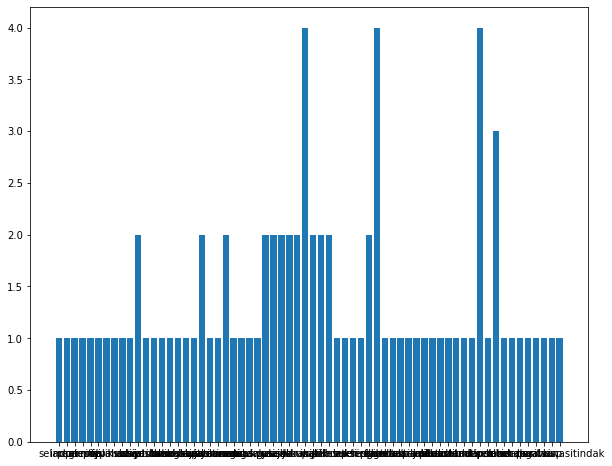

In [32]:
import matplotlib.pyplot as plt
arr=np.asarray(setKosongPOS)
b = Counter(str_list)
plt.figure(figsize=(10, 8))
plt.bar(b.keys(), b.values())

BOW NEGATIF

In [33]:
#BOW NEGATIF
lisbowarrayNEG = []
bowarrayNEG2=[]
for index, row in trainData.iterrows():
    if row['Label'] == "NEG":
        kataNEG =row["processed"]
        cleanNEG = kataNEG.split(" ")
        bowarrayNEG2.append(kataNEG)
        str_listNEG = list(filter(None, cleanNEG))
        setkosongNEG = dict.fromkeys(str_listNEG,0)
        lisbowarrayNEG.append(setkosongNEG)

In [34]:
BOWNEGNULL= pd.DataFrame(lisbowarrayNEG,index=bowarrayNEG2)
BOWNEGNULL.fillna(0)

,hasil,hitung,cepat,anak,menantu,jokowi,tang,pilkada,partisipasi,pilih,...,buka,peluang,sumbar,tuan,rumah,jpi,beritaminangcom,beritaminang,minanghebat,sumbarbermartabat
hasil hitung cepat anak menantu jokowi tang pilkada partisipasi pilih rendah menkopolhukam tekan kait covid pilkada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pilkadamaut data positif covid mati capai orang astaghfirullah pilkada orang kumpul lonjak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmmh gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dpp partai nasdem kakak hermawi taslim ketua tim acara damping calon bupati kabupaten banjar kalimantan selatan pilkadabanjar nasdemantimahar restorasiindonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ri buka peluang sumbar tuan rumah jpi covid sumbar beritaminangcom beritaminang minanghebat sumbarbermartabat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df=pd.DataFrame(BOWNEGNULL)
df.to_excel('setnullNEG.xlsx')

In [36]:
#Menghitung Kemunculan BOW Kata
from collections import Counter
bowaNEG = []
bowarrayNEG = []
setKosongNEG=[]
for index2, row2 in trainData.iterrows():
    if row2['Label'] == "NEG":
        kataNEG2 =row2["processed"]
        bowarrayNEG.append(kataNEG2)
        clean22 = kataNEG2.split(" ")
        str_list12 = list(filter(None, clean22))
        cnt = Counter(str_list12)
        setKosongNEG.append(cnt)
#print(setKosongNEG)

In [37]:
BOWNEG = pd.DataFrame(setKosongNEG,index=bowarrayNEG)
BOWNEG.fillna(0)

,hasil,hitung,cepat,anak,menantu,jokowi,tang,pilkada,partisipasi,pilih,...,buka,peluang,sumbar,tuan,rumah,jpi,beritaminangcom,beritaminang,minanghebat,sumbarbermartabat
hasil hitung cepat anak menantu jokowi tang pilkada partisipasi pilih rendah menkopolhukam tekan kait covid pilkada,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pilkadamaut data positif covid mati capai orang astaghfirullah pilkada orang kumpul lonjak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmmh gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dpp partai nasdem kakak hermawi taslim ketua tim acara damping calon bupati kabupaten banjar kalimantan selatan pilkadabanjar nasdemantimahar restorasiindonesia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ri buka peluang sumbar tuan rumah jpi covid sumbar beritaminangcom beritaminang minanghebat sumbarbermartabat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
df=pd.DataFrame(BOWNEG)
df.to_excel('hitungNEG.xlsx')

In [39]:
#Menghitung tF BOW
arrayBOWNEG = []
arrayTweetNEG=[]
TF = { }
for index2, row2 in trainData.iterrows():
    if row2['Label'] == "NEG":
        kataNEG2 =row2["processed"]
        arrayTweetNEG.append(kataNEG2)
        clean3 = kata2POS.split(" ")
        str_list2 = list(filter(None, clean3))
        setkosong2 = dict.fromkeys(str_list2,0)
        panjang = len(str_list2)
        for word in str_list2:
            setkosong2[word]+=1/panjang
        arrayBOWNEG.append(setkosong2)

In [40]:
nilaiTF = pd.DataFrame(arrayBOWNEG, index=bowarrayNEG)
nilaiTF.fillna(0)

,halo,sahabatbawaslu,depok,desember,bawaslu,kota,terima,serah,lapor,hasil,pantau,rawan,kisp,selenggara,pilkada,bawaslumengawasi,cegahawasitindak
hasil hitung cepat anak menantu jokowi tang pilkada partisipasi pilih rendah menkopolhukam tekan kait covid pilkada,0.045455,0.045455,0.181818,0.045455,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
pilkadamaut data positif covid mati capai orang astaghfirullah pilkada orang kumpul lonjak,0.045455,0.045455,0.181818,0.045455,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.045455,0.045455,0.181818,0.045455,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
mmmh gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.045455,0.045455,0.181818,0.045455,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
dpp partai nasdem kakak hermawi taslim ketua tim acara damping calon bupati kabupaten banjar kalimantan selatan pilkadabanjar nasdemantimahar restorasiindonesia,0.045455,0.045455,0.181818,0.045455,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.045455,0.045455,0.181818,0.045455,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
ri buka peluang sumbar tuan rumah jpi covid sumbar beritaminangcom beritaminang minanghebat sumbarbermartabat,0.045455,0.045455,0.181818,0.045455,0.045455,0.136364,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455


In [41]:
df=pd.DataFrame(nilaiTFIDF)
df.to_excel('hitungTFNEG.xlsx')

In [42]:
#mencari Nilai IDF
import math
arrayIDFNEG = []

Bow= " ".join(arrayTweetNEG)
Bag_Of_Word = Bow.split(" ")
str_list = list(filter(None, Bag_Of_Word))
SetBow = set(str_list)
#print(ngeset1)
SetNull = dict.fromkeys(SetBow,0)

banyak_dokumen=len(bowarrayPOS)
termglobalfreq = {}
for term in SetNull:
    count = 0
    for new in trainData['stopword_word'] :
        if term in new:
            count+=1
    if count > 0:
        termglobalfreq[term] = math.log10(banyak_dokumen/count)
    #log10(Banyak Data Dokumen Terjemahan/jumlah munculnya dokumen terjemahan terhadap trem)
arrayIDFNEG.append(termglobalfreq)

In [43]:
BOWNEG = pd.DataFrame(arrayIDFNEG,index=["Dokumen"])
BOWNEG.fillna(0)

,yazid,masyarakat,pilih,calon,hermawi,inikebumen,tang,bupati,acara,wakil,...,tuan,lonjak,minanghebat,rumah,rendah,kait,hitung,data,nasdem,positif
Dokumen,0.30103,0.30103,0.20412,0.90309,0.90309,0.30103,0.90309,0.20412,0.90309,0.30103,...,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309,0.90309


In [44]:
df=pd.DataFrame(nilaiTFIDF)
df.to_excel('hitungIDFNEG.xlsx')

In [45]:
#Mencarikan TFIDF 
arrayTFIDFNEG = []
for index2, row2 in trainData.iterrows():
    if row2['Label'] == "NEG":
        kataNEG2 =row2["processed"]
        clean3 = kataNEG2.split(" ")
        str_list2NEG = list(filter(None, clean3))
        setkosong2NEG = dict.fromkeys(str_list2NEG,0)
        panjang = len(str_list2NEG)
        for word in str_list2NEG:
            setkosong2NEG[word]+=1/panjang * termglobalfreq[word]
        arrayTFIDFNEG.append(setkosong2NEG)

In [46]:
hasilTFIDFNEG = pd.DataFrame(arrayTFIDFNEG, index=bowarrayNEG)
hasilTFIDFNEG.fillna(0)

,hasil,hitung,cepat,anak,menantu,jokowi,tang,pilkada,partisipasi,pilih,...,buka,peluang,sumbar,tuan,rumah,jpi,beritaminangcom,beritaminang,minanghebat,sumbarbermartabat
hasil hitung cepat anak menantu jokowi tang pilkada partisipasi pilih rendah menkopolhukam tekan kait covid pilkada,0.037629,0.056443,0.056443,0.056443,0.056443,0.056443,0.056443,0.015617,0.056443,0.012757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pilkadamaut data positif covid mati capai orang astaghfirullah pilkada orang kumpul lonjak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010412,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mmmh gus yazid ajak masyarakat dukung bupati wakil bupati pilih inikebumen net,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dpp partai nasdem kakak hermawi taslim ketua tim acara damping calon bupati kabupaten banjar kalimantan selatan pilkadabanjar nasdemantimahar restorasiindonesia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pilkada jalan aman lancar tertib pilkadaamandansehat pilkadataatiprokes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017848,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ri buka peluang sumbar tuan rumah jpi covid sumbar beritaminangcom beritaminang minanghebat sumbarbermartabat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.069468,0.069468,0.138937,0.069468,0.069468,0.069468,0.069468,0.069468,0.069468,0.069468


In [47]:
df=pd.DataFrame(hasilTFIDFNEG)
df.to_excel('hitungTFIDFNEG.xlsx')

<BarContainer object of 12 artists>

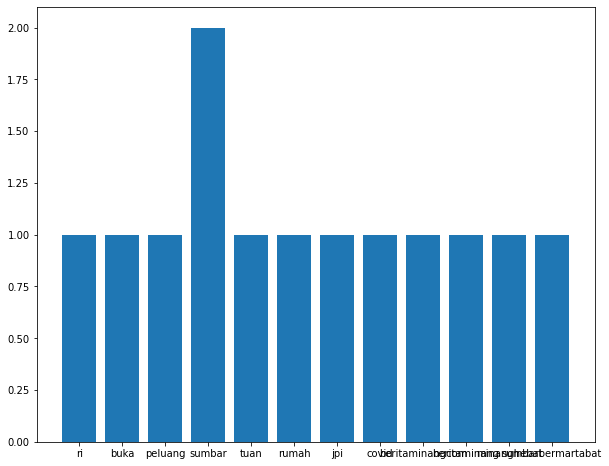

In [48]:
arr=np.asarray(setKosongNEG)
w = Counter(str_list12)
plt.figure(figsize=(10, 8))
plt.bar(w.keys(), w.values())


MENGHITUNG POSITIF & NEGATIF

In [49]:
jumlahPOS= trainData[trainData['Label'] == 'POS']['Label'].count()
jumlahNEG= trainData[trainData['Label'] == 'NEG']['Label'].count()

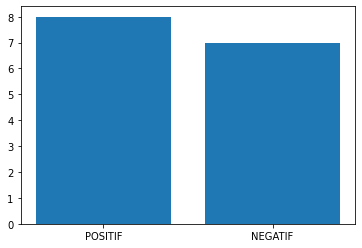

In [50]:
import matplotlib.pyplot as plt
x = np.array(["POSITIF", "NEGATIF"])
y = np.array([jumlahPOS, jumlahNEG])

plt.bar(x,y)
plt.show()

PROSES SVM

In [54]:
testData = pd.read_csv(open('DATA TES/DATA_TRAINING.csv', newline='', encoding='utf-8'), delimiter=';')

In [55]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
import six.moves.cPickle as pickle
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, 
                            sublinear_tf=True, use_idf=True)
train_features = vectorizer.fit_transform(trainData['tweet'])
test_features = vectorizer.transform(testData['tweet'])

# Perform classification with SVM, kernel=linear
classifier_liblinear = svm.LinearSVC()
classifier_liblinear.fit(train_features, trainData['Label'])
prediction_liblinear = classifier_liblinear.predict(test_features)
# # Now we can use the model to predict classifications for our test features.
print(classification_report(testData['Label'], prediction_liblinear))
print("accuracy: {0}".format( accuracy_score(testData['Label'], prediction_liblinear)*100))

              precision    recall  f1-score   support

         NEG       0.25      0.33      0.29         6
         POS       0.43      0.33      0.38         9

    accuracy                           0.33        15
   macro avg       0.34      0.33      0.33        15
weighted avg       0.36      0.33      0.34        15

accuracy: 33.33333333333333
